# Submitting an Ultranest Run

Now that we have climate models with grids, we need to take it to the next level of analysis with nested sampling utilizing [Ultranest](https://johannesbuchner.github.io/UltraNest/readme.html). This is important as to have a deeper and higher level of statistical support in your analysis of your data.


In this tutorial you will learn how to reate and submit a run for Ultranest, including the external scripts needed and their respective optional walkthroughs.


In [1]:
import numpy as np
from bokeh.plotting import figure, show
import matplotlib.pyplot as plt
%matplotlib inline

#picaso
import picaso.justplotit as jpi
import picaso.analyze as lyz
jpi.output_notebook()

import pickle as pk

#ULTRANEST
import ultranest
import ultranest.plot as uplt
import ultranest.integrator as uint
from ultranest.plot import PredictionBand

import xarray as xr
import zipfile
import os

Loading BokehJS ...

## Download Data

As mentioned before in [AnalyzeExoplanet_3_picaso_grid_loop](www.google.com), the grid of models would take too long to compute on a regular laptop, thus a download of the grid of models will be provided for you [here](https://zenodo.org/records/8360121/files/ATMO.zip?download=1). In addition, the data for WASP-17b will be provided [here](https://zenodo.org/records/8360121/files/ATMO.zip?download=1) too. Create a directory, and download the files into there.

Or, simply run the cell below.

In [3]:
gridtrieval_tutorial_dir = 'gridtrieval_files'

In [ ]:
if not os.path.exists(gridtrieval_tutorial_dir):
    os.makedirs(gridtrieval_tutorial_dir)

# Download WASP-17b files from ZENODO into the gridtrieval_tutorial_dir you have defined above
!wget -O WASP_17B_ExoTiC_MIRI "https://zenodo.org/records/8360121/files/ExoTiC-MIRI.zip?download=1"
with zipfile.ZipFile('WASP_17B_ExoTiC_MIRI', 'r') as zip_ref:
    zip_ref.extractall('gridtrieval_files')
os.remove("WASP_17B_ExoTiC_MIRI")


In [ ]:
!wget -O WASP_17B_EUREKA "https://zenodo.org/records/8360121/files/Eureka!.zip?download=1"
with zipfile.ZipFile('WASP_17B_EUREKA', 'r') as zip_ref:
    zip_ref.extractall('gridtrieval_files')
os.remove("WASP_17B_EUREKA")

Let's read the data and see what we are working with.

In [4]:
dataset_path = gridtrieval_tutorial_dir+'/ExoTiC-MIRI/transmission_spectrum_vfinal_bin0.125_utc20230606_132744.nc'
dataset = xr.open_dataset(dataset_path)

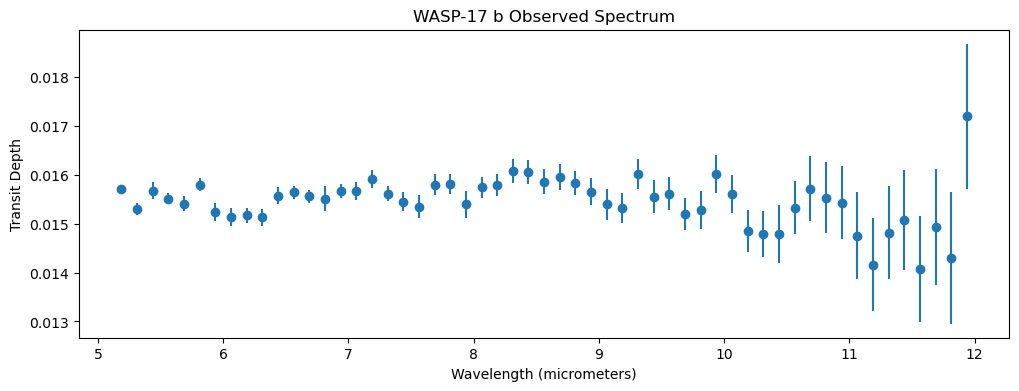

In [5]:
plt=jpi.plt
plt.figure(figsize=(12,4))
plt.errorbar(dataset['central_wavelength'], dataset['transit_depth'], yerr=dataset['transit_depth_error'], fmt='o')
plt.title('WASP-17 b Observed Spectrum')
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel('Transit Depth')
plt.xlabel('Wavelength (micrometers)')
plt.show()

# Model Setup

We need to create the parameters of our model in order to set up our "environment" of analysis. We can use a handy script to do this for us!

This script logs all the parameters (planet, star, atmosphere, etc), points everything we need in the right directory, and sets up the models. Essentially, it does what we have done before but all at once. For more information, follow this [tutorial](google.com).

In [2]:
from model_setup import *

Total number of models in grid is 371
For tint in planet_params grid is: ['200.0' '300.0']
For heat_redis in planet_params grid is: ['0.5' '0.6' '0.7' '0.8']
For mh in planet_params grid is: ['0.0' '0.3' '0.5' '0.7' '1.0' '1.3' '1.5' '1.7' '2.0']
For cto in planet_params grid is: ['0.25' '0.5' '1.0' '1.5' '2.0' '2.5']


# Running Ultranest

Now, we need to run Ultranest which will use nested sampling to give a reliable statistically reinforced analysis. Again, we can use a handy script to make our life easier!

This script uses the previous script and grabs the parameters, grid locations, directories for data and output and defines the likelihoods, finally running Ultranest. Depending on your computer specifications, it may take some time to complete. For more information, follow this [tutorial](google.com).


In [ ]:
%run -i 'run_ultranest.py'

cld_free_virga
['tint', 'heat_redis', 'mh', 'cto', 'offset_hst', 'offset_jwst', 'logkzz', 'fsed'] 8
Turning off Raman for Non-H2 atmosphere
[ultranest] Sampling 400 live points from prior ...


## COMMON DEBUGGING TIPS

If you are running into an error code similar to this:

You can test the specific input and array into the function `model.set` from your `model_setup` script:

and check if y has any nans:

If not … then the issue must be in the loglikelihood function inputs!